# Short Fourier Transform


The first step is to convert our signals into an image.

To do this, we use the short-time Fourier transform on each data item, which decomposes a function from the time domain into the frequency domain.

Once our data is decomposed into frequencies, it is very easy to get an image out of it via a Spectrogram. 

Our basic data is now transformed into an image, which will be used in our next step 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import librosa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fft import fftshift
import os
from PIL import Image

In [54]:
!pwd

/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/notebooks


In [55]:
folder_patient1 = os.listdir('/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/Patient_1_csv')
folder_patient2 = os.listdir('/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/Patient_2_csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/Patient_1_csv'

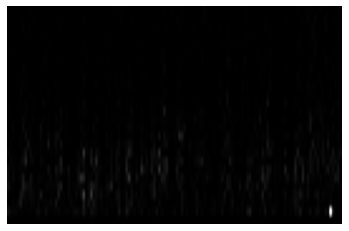

In [39]:
a = 0
for filename in folder_patient1:
    if "interictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_1_csv/{filename}')
        for i in range (0,15):
            arr = data.iloc[i]
            f, t, Sxx = spectrogram(arr, fs=50, nperseg=256)
            plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
            plt.axis('off')
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/interictal_images/sensor{i}/img{a}{i}.png', bbox_inches='tight',pad_inches = 0)
    if "preictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_1_csv/{filename}')
        for i in range (0,15):
            arr = data.iloc[i]
            f, t, Sxx = spectrogram(arr, fs=50, nperseg=256)
            plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
            plt.axis('off')
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/preictal_images/sensor{i}/img{a}{i}.png', bbox_inches='tight',pad_inches = 0)
            

In [27]:
import numpy as np
import pandas as pd
import scipy.io
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

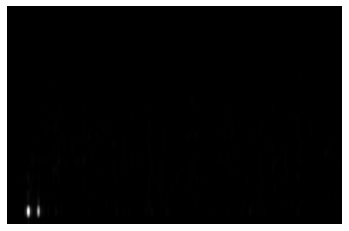

In [38]:
a = 0
b = "p2"
for filename in folder_patient2:
    if "interictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_2_csv/{filename}')
        for i in range (0,15):
            arr = data.iloc[i]
            f, t, Sxx = spectrogram(arr, fs=50, nperseg=256)
            plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
            plt.axis('off')
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/interictal_images/sensor{i}/img{b}{a}{i}.png', bbox_inches='tight',pad_inches = 0)
    if "preictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_1_csv/{filename}')
        for i in range (0,15):
            arr = data.iloc[i]
            f, t, Sxx = spectrogram(arr, fs=50, nperseg=256)
            plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
            plt.axis('off')
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/preictal_images/sensor{i}/img{b}{a}{i}.png', bbox_inches='tight',pad_inches = 0)
            

## This cell reorganizes the files to match the tf.keras.preprocessing.image_dataset_from_directory library


Adapt with your own path 

In [49]:
dirName = '../SafeSeizure/data/';
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]

In [53]:
import pandas as pd
df = pd.DataFrame({'path': listOfFiles})
df = df[df.path.str.contains('png')]
files = df.path.values
!mkdir {dirname}dataset
for src in files:
    class_, sensor, image_id = src.split('/')[-3:]
    dest_file = f'{dirname}dataset/{sensor}/{class_}'
    dest = f'{dest_file}/{image_id}'
    !mkdir -p {dest_file}
    !cp {src} {dest}

mkdir: dataset: File exists
